<h3 align="right">IIA1420 Machine Learning and Sensor Technology</h3>
<br>
<br>
<hr>
 

<!--<h4 align="center">Assignment 2:</h4> -->

<h1 align="center">Assignment 2 - Data Visualization and Regression Models</h1>
<h3 align="center">NASA Turbofan Jet Engine Dataset</h3>

<h1  align="left"><font color="blue">Introduction</font></h1>

<p style="text-align:justify">Maintenance is a general process in the industry to ensure the proper functionality and reliability of the plants and assets. In general, there are three types of maintenance strategies running in the industry: (1) corrective maintenance, (2) preventive maintenance, and (3) predictive maintenance. Corrective maintenance is the cheapest type of maintenance in which the piece of equipment runs to the point of failure. Usually, if the instrument's failure has no significant consequences, corrective maintenance can be a proper option. However, in most of the industrial applications, this is not the case and failure in one asset may lead to catastrophic situation. For instance, if a turbofan jet engine fails on the sky, the consequence is loss of humans' life. On the other hand, if the maintenance is conducted regularly and according to a pre-schedule plan, the strategy is called preventive/preventative maintenance. In turbofan jet engine, this can be done after each landing and/or before each take off. In addition, more detailed investigations are done after some amount of flight duration. </p>

<p style="text-align:justify">Preventive maintenance strategy has some drawbacks where under-/over-maintenance are the most promising and inevitable ones. If the intervals between maintenance phases are too long, then there is a high risk of failure before the next maintenance time (i.e., under-maintenance). However, maintening the asset too often (i.e., over-maintenance) is not acceptable either because of imposing unnecessary costs. Predictive maintenance (PdM) is the only method that uses monitoring information for predicting failures and triggering the actions before they occur and prevents over-/under-maintenance problems. </p>

<p style="text-align:justify">Interestingly, PdM is not a new approach and its origin goes back to the Second World War. In that time, a British scientist named C.H. Waddington improved the availability of the fighters and bombers from 61% to 79% by providing condition-based maintenance recommendations for the Royal Air Force. During the past two decades, machine learning techniques are the main tools for dealing with prediction of failure or calculation of the remaining lifetime of the assets. Therefore, the PdM can be defined as either a regression problem or a classification problem. </p>

<p style="text-align:justify">In this assignment, your task is to use machine learning approches for estimating the remaining life time of turbofac jet engines which is a regression problem. The dataset you are going to use for in this assignment is a very well known public data set for asset degradation modeling from NASA. The Kaggle version of this dataset with sample codes for solving the problem are accessable through this link: <a href="https://www.kaggle.com/datasets/behrad3d/nasa-cmaps"> https://www.kaggle.com/datasets/behrad3d/nasa-cmaps</a>.</p>

<h1  align="left"><font color="blue">About Dataset <a href="https://www.kaggle.com/datasets/behrad3d/nasa-cmaps">[link to Kaggle page]</a></font></h1>
 
<p style="text-align:justify">The dataset includes Run-to-Failure simulated data from turbofan jet engines and is known as "NASA C_MAPSS dataset". It contains four subsets (FD001 - FD004) of different operating conditions and possible fault modes. Each dataset is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.</p>

<p style="text-align:justify">The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data. </p>


<p style="text-align:justify">The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces (<a href="https://www.kaggle.com/datasets/behrad3d/nasa-cmaps/download?datasetVersionNumber=1">download original dataset</a>). Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:
    
1) unit number
    
2) time, in cycles
    
3) operational setting 1
    
4) operational setting 2
    
5) operational setting 3
    
6) sensor measurement 1
    
7) sensor measurement 2
    
…
    
26) sensor measurement 21</p>

<h1  align="left"><font color="blue">Modified Dataset for the Assignment</font></h1>
 
<p style="text-align:justify">For this assignment, you are supposed to work only with dataset no. 1. For ease of use, the original datasets are modified so that you only need to import data from two CSV files in standard "," separated format ("train_FD001.csv" and "test_FD001.csv"). The modified files also contain the headers for more readability. A column name "RUL" is also added to the datasets which indicates the remaining useful life for each row of data. Note that, for each engine in the train set, RUL starts at some value and reach zero after a number of cycles. The value for RUL simply means indicates how many more cycles the engine can be run. Therefore, zero value means the engine has failed at that cycle and it is not useable any more. In the test set, however, the value of RUL does not reach zero as the engine has been stoped at some random cycle before failure. The main task is to predict the RUL at the end of each cycle based on all the information from that engine (excluding the RUL value) from same and previous cycles.</p>

<p style="text-align:justify">Let us take a look at the train set:</p>

In [1]:
import pandas as pd
#Load the training set
fd_001_train  = pd.read_csv('train_FD001.csv')
#Load the test set
fd_001_test = pd.read_csv('test_FD001.csv')
fd_001_train

,engine,cycle,setting 1,setting 2,setting 3,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,...,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191.0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190.0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189.0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188.0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4.0
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3.0
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2.0
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1.0


<h3>Imports</h3>

In [2]:

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
%matplotlib widget


ModuleNotFoundError: No module named 'ipympl'

In [ ]:
#Code source: https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Report", "fig")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
""" import os
import tarfile
import urllib.request """

' import os\nimport tarfile\nimport urllib.request '

<h2  align="left"><font color="red">Task 1: </font><font color="blue">Understanding the data and problem</font></h2>
 
<p style="text-align:justify">In machine learning, the first and sometimes the most important step is to understand the data and the problem you are asked to solve. Therefore, your first task is to make yourself familiar with the dataset. You do not need to provide any feedback for this task. However, it would be much more deficult for you to do the other tasks without fulfilling this task. At the end of this task, you must answer the following questions for yourself:</p>

* What type of problem are you going to solve? (regression or classification)
* What category of machine learning methods you need to use? (supervised learning, unsupervised learning, reinforcement learning)
* What does each column in the dataset represent?
* Which columns are the features and the target(s)?
* Is there any column which represents neither a feature nor a target?
 

<h2  align="left"><font color="red">Task 2: </font><font color="blue">Data visulization</font></h2>
 
<p style="text-align:justify">Data visualization helps you to understand the trends and paterns in the data. A better insides to the data, makes it easier to prepare yourself and the data for further steps. Use the concepts and methods you learned in the second chapter of the book "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow" and try different techniques to gain proper insight into the data. Feel free to use any other techniques as well. Here are some hints:</p>

* If you import your data using pandas package (like what we did previously), then the dataset is stored in a "pandas.dataframe" type variable. You can find the documentation for pandas package <a href="https://pandas.pydata.org/docs/index.html">here</a>. 
* Try to use charts, plots, histographs, etc.
* There are several other useful packages which can help you here. For instance, you may try "seaborn" package. 


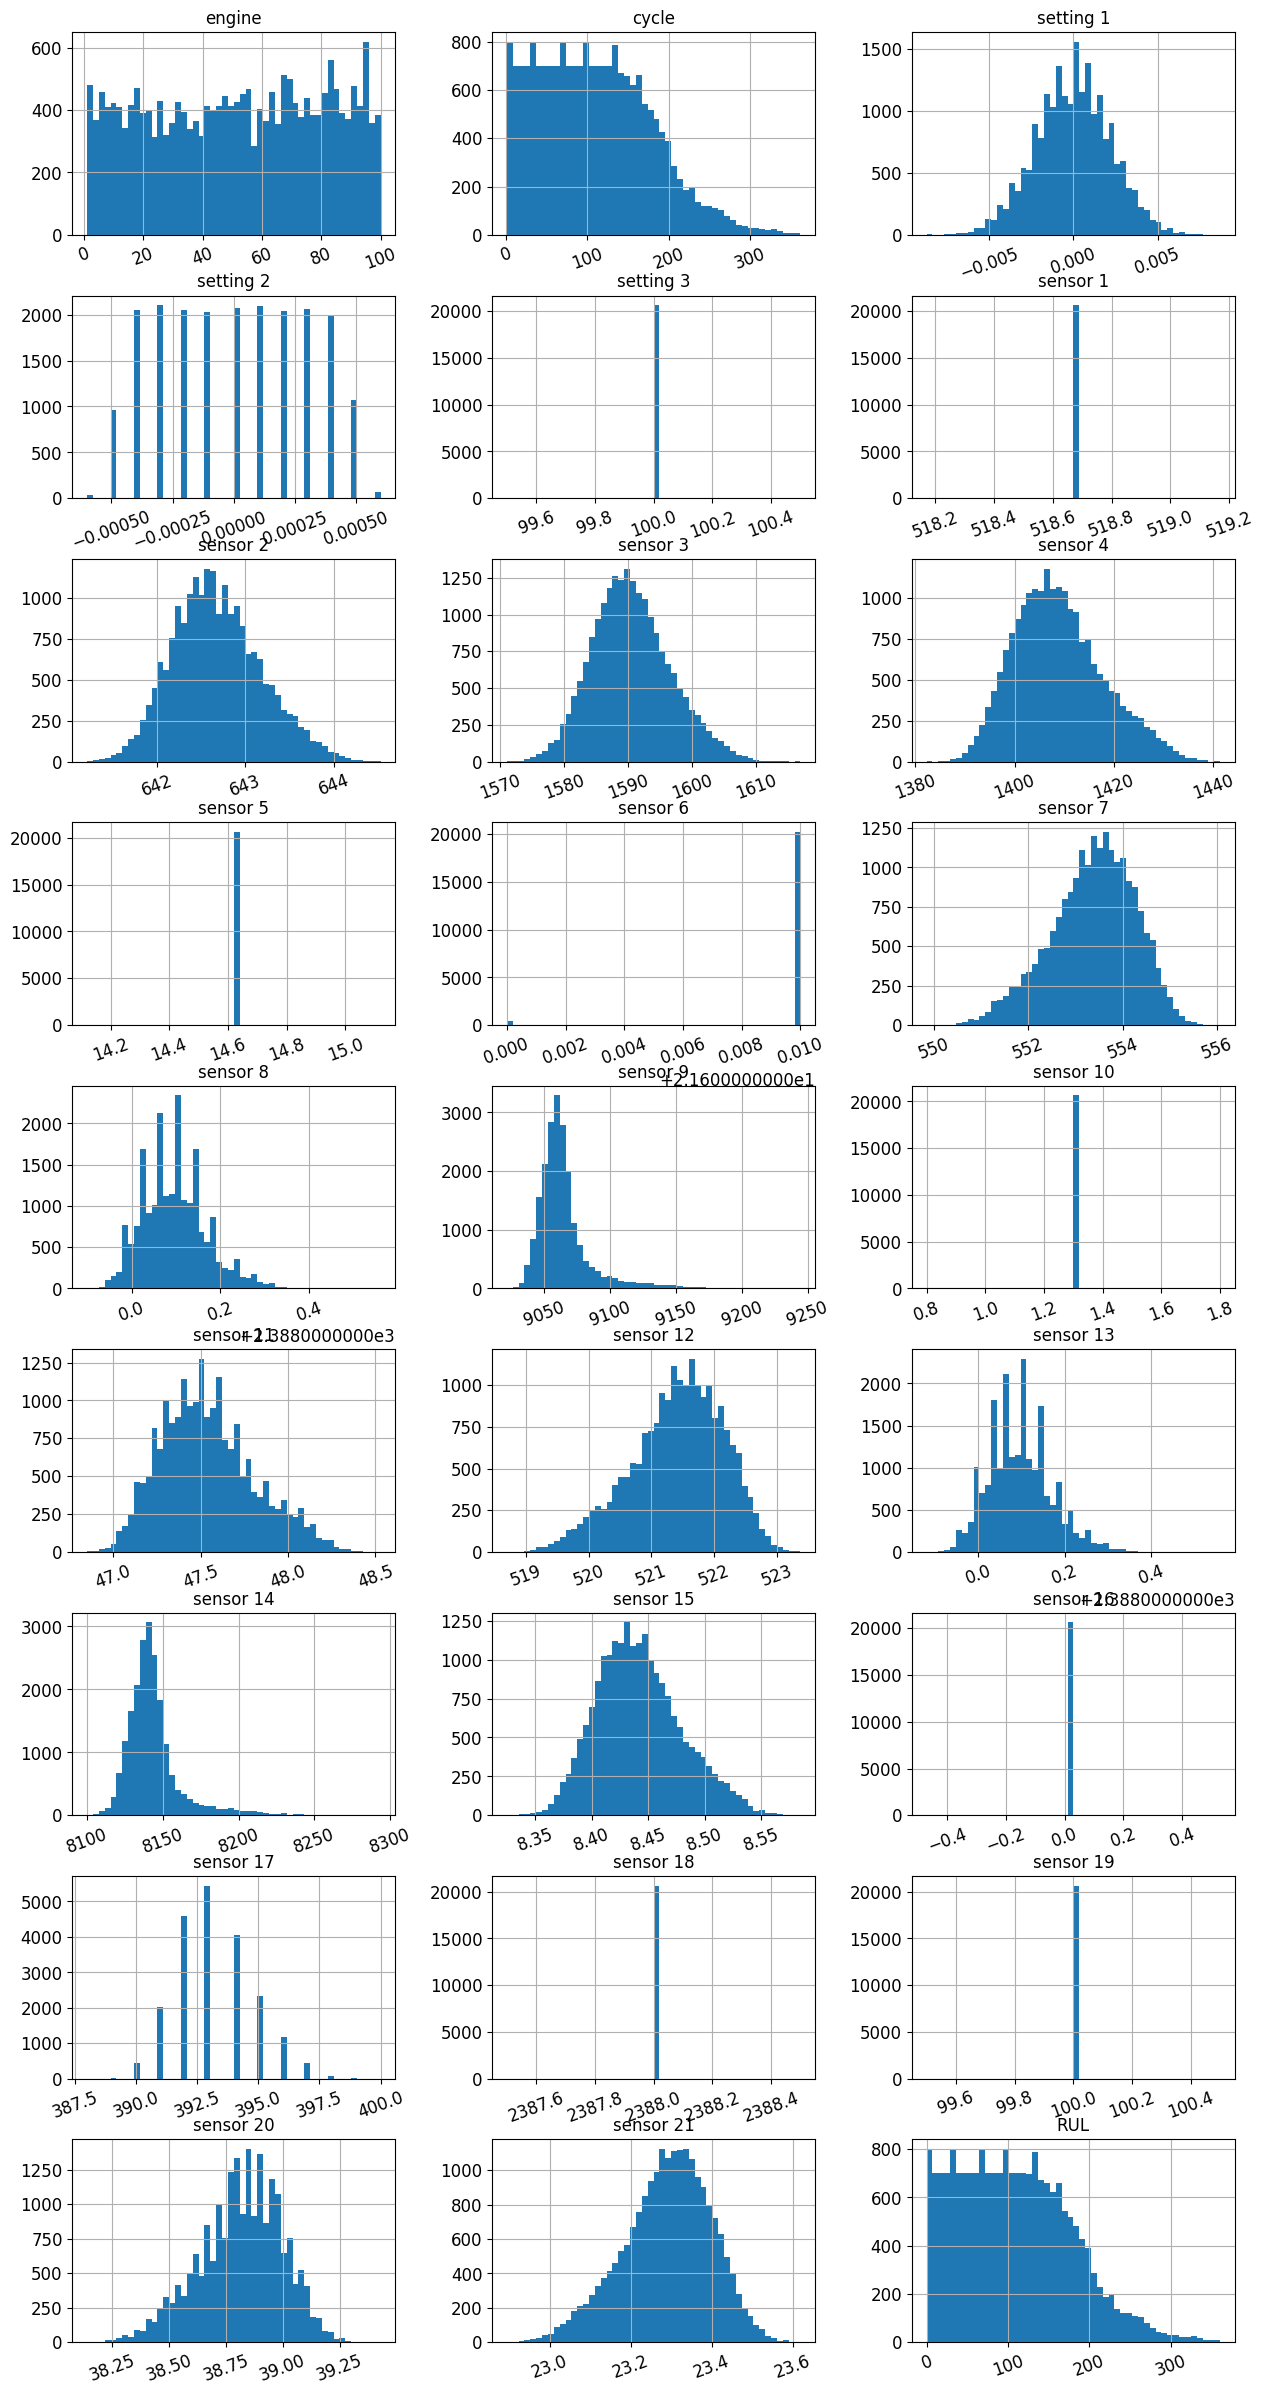

,engine,cycle,setting 1,setting 2,setting 3,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,...,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [ ]:
%matplotlib inline
fd_001_train.hist(bins=50, figsize=(15,30), layout=(9,3), xrot=20)
#save_fig("AttributeHistogram")
plt.show()
fd_001_train.describe()

<h2  align="left"><font color="red">Task 3: </font><font color="blue">Preprocessing and feature selection</font></h2>
 
<p style="text-align:justify">Based on your knowledge gained from task 2, are there any features you may prefer to remove from from data? Do you need to scale the data? Explain your answers and continue the next steps based on your decisions (i.e., apply your answers on the data). Hints:</p>

* High difference between feature values may lead to a poor model. 
* If the target has a very low correlation with a feature, then probably that feature cannot contribute much to your model. 
* If two features are highly correlated, in many cases, using one of them in the model is sufficient. 
* If the value of one feature remains constant (i.e., zero variance), may it be useful?
* <a href="https://arxiv.org/ftp/arxiv/papers/2112/2112.05372.pdf">This article</a> may be useful for you. 

<h4>Looking for correlations</h4>

In [ ]:
corr_matrix = fd_001_train.corr()
corr_matrix["RUL"].sort_values(ascending=False) #RUL = Remaining usefull life

RUL          1.000000
sensor 12    0.671983
sensor 7     0.657223
sensor 21    0.635662
sensor 20    0.629428
engine       0.078753
setting 2   -0.001948
setting 1   -0.003198
sensor 6    -0.128348
sensor 14   -0.306769
sensor 9    -0.390102
sensor 13   -0.562569
sensor 8    -0.563968
sensor 3    -0.584520
sensor 17   -0.606154
sensor 2    -0.606484
sensor 15   -0.642667
sensor 4    -0.678948
sensor 11   -0.696228
cycle       -0.736241
setting 3         NaN
sensor 1          NaN
sensor 5          NaN
sensor 10         NaN
sensor 16         NaN
sensor 18         NaN
sensor 19         NaN
Name: RUL, dtype: float64

In [ ]:
def correlation(data, p):
    print('Number of features:', len(data.columns))
    columns1 = columns2 = data.columns
    for coli in columns1:
        columns2 = columns2.drop(coli)
        for colj in columns2:
            corr = data[coli].corr(data[colj])
            if np.abs(corr) >= p:
                print('Correlation between ' + coli + ' and ' + colj + ' is ' + str(np.round(corr,3)))
print(correlation(corr_matrix, 0.9))

Number of features: 27
Correlation between cycle and sensor 2 is 0.949
Correlation between cycle and sensor 3 is 0.952
Correlation between cycle and sensor 4 is 0.957
Correlation between cycle and sensor 7 is -0.949
Correlation between cycle and sensor 11 is 0.955
Correlation between cycle and sensor 12 is -0.949
Correlation between cycle and sensor 15 is 0.955
Correlation between cycle and sensor 17 is 0.956
Correlation between cycle and sensor 20 is -0.957
Correlation between cycle and sensor 21 is -0.958
Correlation between cycle and RUL is -0.986
Correlation between sensor 2 and sensor 3 is 0.972
Correlation between sensor 2 and sensor 4 is 0.987
Correlation between sensor 2 and sensor 7 is -0.986
Correlation between sensor 2 and sensor 8 is 0.966
Correlation between sensor 2 and sensor 11 is 0.988
Correlation between sensor 2 and sensor 12 is -0.988
Correlation between sensor 2 and sensor 13 is 0.965
Correlation between sensor 2 and sensor 15 is 0.984
Correlation between sensor 2 

<h4>Trying out RFECV to select features</h4>

In [ ]:
estimator = Ridge(alpha=1)
feature_selector = RFECV(estimator, step=1, cv=5)
feature_selector.fit(fd_001_train.drop("RUL", axis=1),fd_001_train["RUL"])

RFECV(cv=5, estimator=Ridge(alpha=1))

In [ ]:

def feature_elimination(feature_model, X_train, Y_train, method = 'RFECV', cv = 5):
    selector = RFECV(feature_model, step=1, cv= cv)
    selector = selector.fit(X_train, Y_train)

    drop_features = []
    for i, feature in enumerate(X_train.columns):
        if selector.support_[i] == False:
            drop_features.append(feature)

    print(drop_features)

estimator = Ridge(alpha=1)
#estimator = RandomForestRegressor(max_features="sqrt", n_jobs=8)
feature_elimination(estimator,fd_001_train.drop("RUL", axis=1),fd_001_train["RUL"])

['setting 3', 'sensor 1', 'sensor 5', 'sensor 10', 'sensor 14', 'sensor 16', 'sensor 18', 'sensor 19']


<h4>Data cleaning</h4>

<p>
Initially, some ideas of what features to drop were made through observation of the histogram and the correlation matrix. Following decisions were made:

The engine (ID) attribute is again not a feature or a target, and we can see that most engines have similar amounts of data points, engine attribute could safely be removed.
RUL was removed because it is the target.
Setting 3 and sensors 1, 5, 6, 10, 16, 18, 19 were removed because they all have constant values.
Sensor 7, 11, 12, 15, 17, 20, and 21 were removed because they were too highly correlated to other features, perhaps these are redundant sensors.

Additionally, after running the scikit-learn recursive feature elimination with cross-validation function (RFECV), using a ridge regression estimator, sensor 14 was also deemed unimportant. The reason for using ridge for the estimator here, is to try to avoid bias from using the same regression method as used in later models.

The remaining attributes were then:
Cycle, setting 1 and 2, sensor 2, 3, 4, 8, 9 and 13.
</p>

In [ ]:
#Dropping data that might not help
features_id = ['engine']
features_high_corr = ['sensor 7', 'sensor 11', 'sensor 12', 'sensor 15', 'sensor 17', 'sensor 20', 'sensor 21']
features_constant = ['setting 3', 'sensor 1', 'sensor 5', 'sensor 6', 'sensor 10', 'sensor 16', 'sensor 18', 'sensor 19']
features_ridge = ['sensor 14']
features_target = ['RUL']

features_to_drop = features_id + features_high_corr + features_constant + features_ridge + features_target
features_to_drop

clean_test = fd_001_test.copy()
clean_train = fd_001_train.copy()
for feat in features_to_drop:
    clean_train = clean_train.drop(feat, axis=1)
    clean_test = clean_test.drop(feat, axis=1)

print(clean_test)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        #('std_scaler', StandardScaler()),
    ])


fan_prepared = num_pipeline.fit_transform(clean_train)
fan_labels = np.log(fd_001_train["RUL"].copy()+1)

fan_prepared_test = num_pipeline.fit_transform(clean_test)
fan_labels_test = np.log(fd_001_test["RUL"].copy()+1)


       cycle  setting 1  setting 2  sensor 2  sensor 3  sensor 4  sensor 8  \
0          1     0.0023     0.0003    643.02   1585.29   1398.21   2388.04   
1          2    -0.0027    -0.0003    641.71   1588.45   1395.42   2388.01   
2          3     0.0003     0.0001    642.46   1586.94   1401.34   2388.05   
3          4     0.0042     0.0000    642.44   1584.12   1406.42   2388.03   
4          5     0.0014     0.0000    642.51   1587.19   1401.92   2388.01   
...      ...        ...        ...       ...       ...       ...       ...   
13091    194     0.0049     0.0000    643.24   1599.45   1415.79   2388.02   
13092    195    -0.0011    -0.0001    643.22   1595.69   1422.05   2388.05   
13093    196    -0.0006    -0.0003    643.44   1593.15   1406.82   2388.11   
13094    197    -0.0038     0.0001    643.26   1594.99   1419.36   2388.07   
13095    198     0.0013     0.0003    642.95   1601.62   1424.99   2388.06   

       sensor 9  sensor 13  
0       9050.17    2388.03  
1    

<h2  align="left"><font color="red">Task 4: </font><font color="blue">Regression models</font></h2>
 
<p style="text-align:justify">Use "scikit-learn" package and make different regression models based on the train dataset. Then use each model on the test dataset and discuss about your results. In addition, answer the following questions:</p>

* Which regression model does perform best on this dataset?
* Is it benificial to hire non-linear regression models?


<h4>Linear model</h4>

In [ ]:
#Creating the linear model
lin_reg = LinearRegression()
lin_reg.fit(fan_prepared, fan_labels)
lin_reg.intercept_, lin_reg.coef_

(11427.250899908788,
 array([-2.88739493e-03, -1.64401769e+00,  2.80353932e+01, -1.90688925e-01,
        -1.16264449e-02, -2.01471833e-02, -2.35201696e+00, -1.29511154e-02,
        -2.31099874e+00]))

<h4>Polynomial model</h4>

In [ ]:
poly2 = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
poly_features2 = poly2.fit_transform(fan_prepared)
poly_reg2 = LinearRegression()
poly_reg2 = poly_reg2.fit(poly_features2, fan_labels)
poly_reg2.intercept_, poly_reg2.coef_

(-9419749.14328111,
 array([ 1.95763600e-01,  5.56449041e+01, -1.11116227e+05,  1.41396710e+06,
         3.85311804e+03,  1.93758127e+02,  3.56198723e+02,  5.85391295e+03,
        -1.51182649e+02,  1.23413448e+03,  3.26189167e-05, -4.45785336e-02,
         4.17958020e-02, -1.58211858e-04, -5.23259451e-06, -4.41670772e-06,
        -1.32275294e-02, -3.42388653e-05, -9.89922177e-03, -8.91319607e+02,
        -6.70635507e+03,  7.91606708e+00, -2.53766237e-02, -5.64003219e-01,
         1.29530565e+01,  1.29347149e-01,  3.13058597e+01,  3.29880045e+04,
         1.53398623e+01,  1.30243330e+00,  4.14288579e+00, -5.92794967e+02,
        -1.33920902e+00, -1.64970359e+00,  9.21404909e-03, -1.47888238e-03,
        -3.46429342e-03, -8.80437171e-01, -2.38903621e-03, -7.25953683e-01,
        -8.67107883e-06, -2.26564007e-05, -1.93812220e-02, -1.60990632e-04,
        -6.07233187e-02, -2.71209976e-04, -5.81371553e-02, -1.84704877e-04,
        -8.90568083e-02, -2.15702414e+00,  2.99107709e-02,  2.033168

<h4>Tree (RF)</h4>

In [ ]:
rf = RandomForestRegressor(200,max_features=fan_prepared.shape[1]//3)
rf.fit(fan_prepared, fan_labels)

RandomForestRegressor(max_features=3, n_estimators=200)

<BarContainer object of 9 artists>

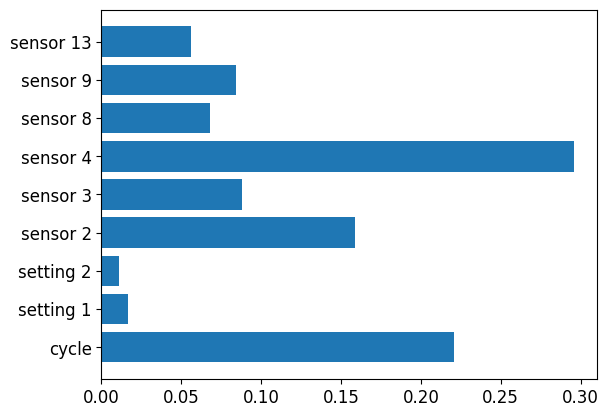

In [ ]:
rf.feature_importances_
plt.barh(clean_train.columns, rf.feature_importances_)

In [ ]:
fan_predictions = lin_reg.predict(fan_prepared_test)
fan_predictions = np.exp(fan_predictions)-1
lin_mse = mean_squared_error(np.exp(fan_labels_test)-1, fan_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

57.82783820632098

In [ ]:
fan_predictions_rf = rf.predict(fan_prepared_test)
fan_predictions_rf = np.exp(fan_predictions_rf)-1
lin_mse = mean_squared_error(np.exp(fan_labels_test)-1, fan_predictions_rf)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

42.23836901285424

In [ ]:
poly_features_test = poly2.fit_transform(fan_prepared_test)
fan_predictions_poly = poly_reg2.predict(poly_features_test)
fan_predictions_poly = np.exp(fan_predictions_poly)-1
poly_mse = mean_squared_error(np.exp(fan_labels_test)-1, fan_predictions_poly)
poly_rmse = np.sqrt(poly_mse)
poly_rmse

43.19607291466172

<p>
According to the root mean square errors, it looks like the random forest performs the best, 2nd order polynomial in second place and linear model being the worst performer.
</p>

<p>
Lets plot how the predicted RUL values compared to the real values from the test-set:
</p>

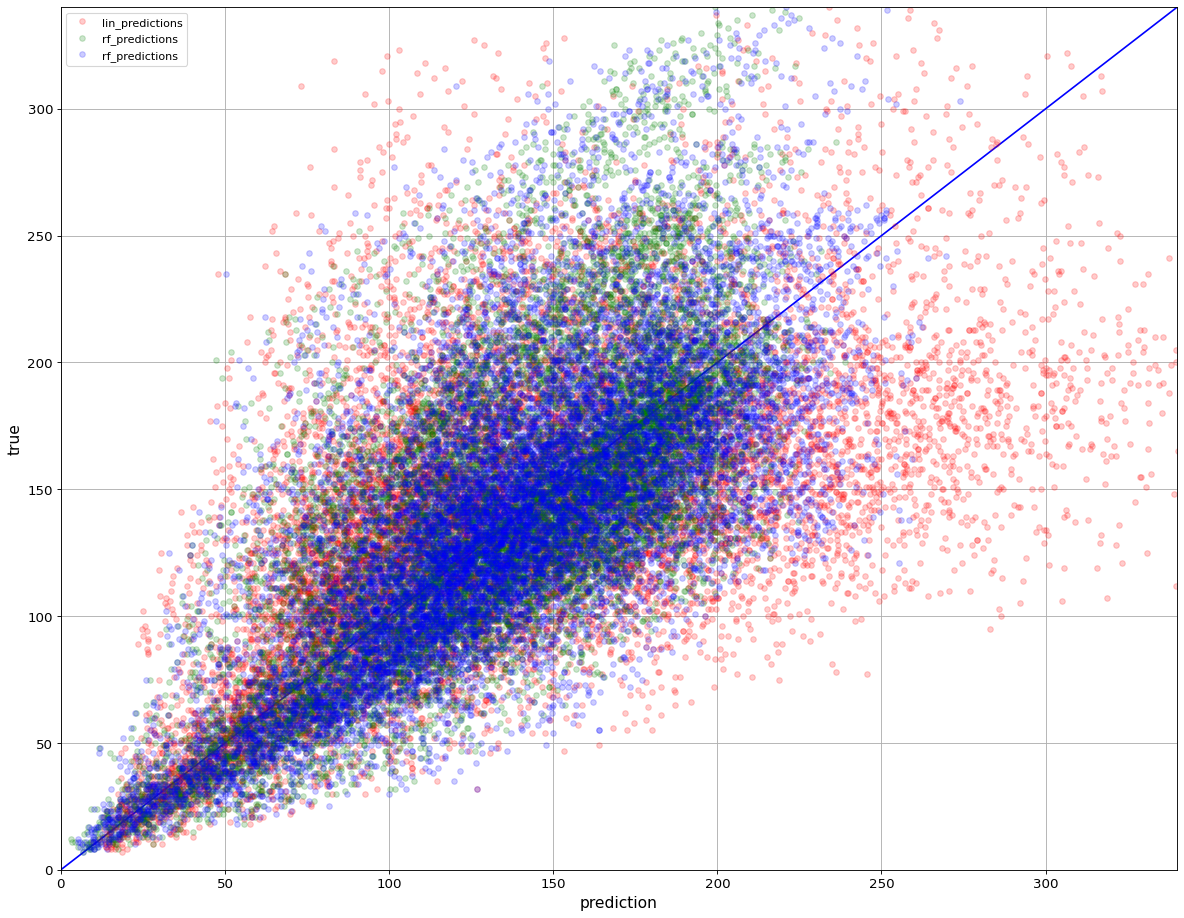

13096


In [ ]:
figure(figsize=(18, 14), dpi=80)
x = np.linspace(0,500,500)
plt.plot(x,x,"b-")
plt.plot(fan_predictions[:13000], fd_001_test["RUL"][:13000], "r.", label="lin_predictions", alpha=0.2, markersize=10)
plt.plot(fan_predictions_rf[:13000], fd_001_test["RUL"][:13000], "g.", label="rf_predictions", alpha=0.2, markersize=10)
plt.plot(fan_predictions_poly[:13000], fd_001_test["RUL"][:13000], "b.", label="rf_predictions", alpha=0.2, markersize=10)
plt.legend()
plt.xlim(0,np.max(fd_001_test["RUL"]))
plt.ylim(0,np.max(fd_001_test["RUL"]))
plt.xlabel('prediction')
plt.ylabel('true')
plt.grid()
#save_fig("All models scattered")
plt.show()
print(len(fan_predictions))

<p>
This plot seems to show the same results that was observed wtih the root mean square errors. Random forest and polynomial models wrap the tightest around the true line y=x. However with values greater than 250, the linear model looks to perform the best. This is also the most important/interesting part of the regression. Therefore the linear model might be the best.
</p>

Learning curves

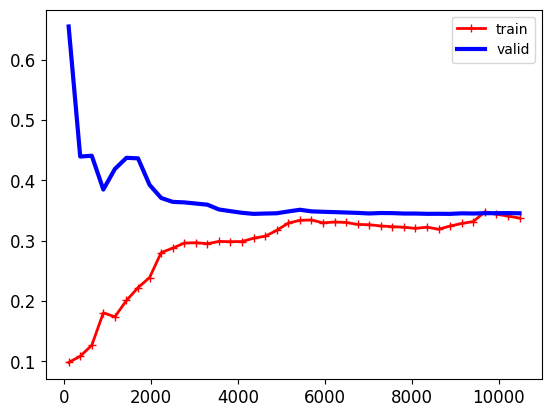

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(
    lin_reg, fan_prepared_test, fan_labels_test, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.clf()
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend()
#[...]  # beautify the figure: add labels, axis, grid and legend.
plt.show()

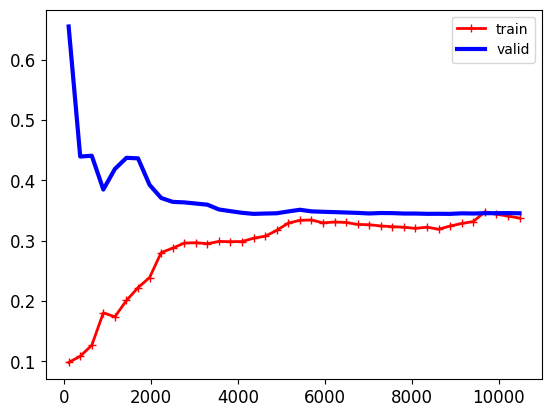

In [ ]:
train_sizes2, train_scores2, valid_scores2 = learning_curve(
    poly_reg2, fan_prepared_test, fan_labels_test, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors2 = -train_scores2.mean(axis=1)
valid_errors2= -valid_scores2.mean(axis=1)
plt.clf()
plt.plot(train_sizes2, train_errors2, "r-+", linewidth=2, label="train")
plt.plot(train_sizes2, valid_errors2, "b-", linewidth=3, label="valid")
plt.legend()
#[...]  # beautify the figure: add labels, axis, grid and legend.
plt.show()

<p>
I can't see why the learning curves look this equal.
</p>

<p></p>

<h2  align="left"><font color="red">Task 5: </font><font color="blue">Regression models with extended features</font></h2>
 
<p style="text-align:justify">While modeling you need to think if your system is dynamic or static. In a static system, for prediction of an output at each time-step, you only need the current value of features at that time-step. However, if the system is dynamic, then in addition to current values of the features, the past history of the system also affect the output at current time-step. Therefore, if your system is dynamic, your model needs to consider the past values of features in addition to their current values. This can easily be done by adding "shifted features" to the dataset as new features. Your last taks is to add shifted features to the dataset (for example: 2 previous values of each feature) and make new regression models (linear regression is sufficient). Compare your results with previous task. </p>


Reloading the data set

In [ ]:
#Load the training set
fd_001_train_for_expanding  = pd.read_csv('train_FD001.csv')
#Load the test set
fd_001_test_for_expanding = pd.read_csv('test_FD001.csv')

Expanding all the features with 2 previous instances, remembering to restart this process for each unique engine.

In [ ]:
fd_001_train_for_expanding["sensor 2 lag1"] = fd_001_train_for_expanding.groupby("engine")["sensor 2"].shift(1)
fd_001_train_for_expanding["sensor 2 lag2"] = fd_001_train_for_expanding.groupby("engine")["sensor 2"].shift(2)
fd_001_train_for_expanding["sensor 3 lag1"] = fd_001_train_for_expanding.groupby("engine")["sensor 3"].shift(1)
fd_001_train_for_expanding["sensor 3 lag2"] = fd_001_train_for_expanding.groupby("engine")["sensor 3"].shift(2)
fd_001_train_for_expanding["sensor 4 lag1"] = fd_001_train_for_expanding.groupby("engine")["sensor 4"].shift(1)
fd_001_train_for_expanding["sensor 4 lag2"] = fd_001_train_for_expanding.groupby("engine")["sensor 4"].shift(2)
fd_001_train_for_expanding["sensor 8 lag1"] = fd_001_train_for_expanding.groupby("engine")["sensor 8"].shift(1)
fd_001_train_for_expanding["sensor 8 lag2"] = fd_001_train_for_expanding.groupby("engine")["sensor 8"].shift(2)
fd_001_train_for_expanding["sensor 9 lag1"] = fd_001_train_for_expanding.groupby("engine")["sensor 9"].shift(1)
fd_001_train_for_expanding["sensor 9 lag2"] = fd_001_train_for_expanding.groupby("engine")["sensor 9"].shift(2)
fd_001_train_for_expanding["sensor 13 lag1"] = fd_001_train_for_expanding.groupby("engine")["sensor 13"].shift(1)
fd_001_train_for_expanding["sensor 13 lag2"] = fd_001_train_for_expanding.groupby("engine")["sensor 13"].shift(2)
fd_001_train_for_expanding["setting 1 lag1"] = fd_001_train_for_expanding.groupby("engine")["setting 1"].shift(1)
fd_001_train_for_expanding["setting 1 lag2"] = fd_001_train_for_expanding.groupby("engine")["setting 1"].shift(2)
fd_001_train_for_expanding["setting 2 lag1"] = fd_001_train_for_expanding.groupby("engine")["setting 2"].shift(1)
fd_001_train_for_expanding["setting 2 lag2"] = fd_001_train_for_expanding.groupby("engine")["setting 2"].shift(2)


fd_001_test_for_expanding["sensor 2 lag1"] = fd_001_test_for_expanding.groupby("engine")["sensor 2"].shift(1)
fd_001_test_for_expanding["sensor 2 lag2"] = fd_001_test_for_expanding.groupby("engine")["sensor 2"].shift(2)
fd_001_test_for_expanding["sensor 3 lag1"] = fd_001_test_for_expanding.groupby("engine")["sensor 3"].shift(1)
fd_001_test_for_expanding["sensor 3 lag2"] = fd_001_test_for_expanding.groupby("engine")["sensor 3"].shift(2)
fd_001_test_for_expanding["sensor 4 lag1"] = fd_001_test_for_expanding.groupby("engine")["sensor 4"].shift(1)
fd_001_test_for_expanding["sensor 4 lag2"] = fd_001_test_for_expanding.groupby("engine")["sensor 4"].shift(2)
fd_001_test_for_expanding["sensor 8 lag1"] = fd_001_test_for_expanding.groupby("engine")["sensor 8"].shift(1)
fd_001_test_for_expanding["sensor 8 lag2"] = fd_001_test_for_expanding.groupby("engine")["sensor 8"].shift(2)
fd_001_test_for_expanding["sensor 9 lag1"] = fd_001_test_for_expanding.groupby("engine")["sensor 9"].shift(1)
fd_001_test_for_expanding["sensor 9 lag2"] = fd_001_test_for_expanding.groupby("engine")["sensor 9"].shift(2)
fd_001_test_for_expanding["sensor 13 lag1"] = fd_001_test_for_expanding.groupby("engine")["sensor 13"].shift(1)
fd_001_test_for_expanding["sensor 13 lag2"] = fd_001_test_for_expanding.groupby("engine")["sensor 13"].shift(2)
fd_001_test_for_expanding["setting 1 lag1"] = fd_001_test_for_expanding.groupby("engine")["setting 1"].shift(1)
fd_001_test_for_expanding["setting 1 lag2"] = fd_001_test_for_expanding.groupby("engine")["setting 1"].shift(2)
fd_001_test_for_expanding["setting 2 lag1"] = fd_001_test_for_expanding.groupby("engine")["setting 2"].shift(1)
fd_001_test_for_expanding["setting 2 lag2"] = fd_001_test_for_expanding.groupby("engine")["setting 2"].shift(2)

<h3>Following is a lot of repeating code from earlier, to create models, calculating RMSE and plotting models vs true values.</h3>

In [ ]:
#Dropping data that might not help
features_id = ['engine']
features_high_corr = ['sensor 7', 'sensor 11', 'sensor 12', 'sensor 15', 'sensor 17', 'sensor 20', 'sensor 21']
features_constant = ['setting 3', 'sensor 1', 'sensor 5', 'sensor 6', 'sensor 10', 'sensor 16', 'sensor 18', 'sensor 19']
features_ridge = ['sensor 14']
features_target = ['RUL']

features_to_drop = features_id + features_high_corr + features_constant + features_ridge + features_target
features_to_drop

clean_test = fd_001_test_for_expanding.copy()
clean_train = fd_001_train_for_expanding.copy()
for feat in features_to_drop:
    clean_train = clean_train.drop(feat, axis=1)
    clean_test = clean_test.drop(feat, axis=1)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        #('std_scaler', StandardScaler()),
    ])


fan_prepared = num_pipeline.fit_transform(clean_train)
fan_labels = np.log(fd_001_train["RUL"].copy()+1)

fan_prepared_test = num_pipeline.fit_transform(clean_test)
fan_labels_test = np.log(fd_001_test["RUL"].copy()+1)

In [ ]:
#Creating the linear model
lin_reg = LinearRegression()
lin_reg.fit(fan_prepared, fan_labels)
lin_reg.intercept_, lin_reg.coef_

(11504.102379746899,
 array([-2.44471386e-03, -7.82757610e-01,  2.80175069e+01, -9.71316148e-02,
        -5.83463029e-03, -9.69039912e-03, -1.04290952e+00, -3.98239306e-03,
        -1.00709651e+00, -8.57998512e-02, -6.51224579e-02, -4.71639301e-03,
        -3.88348470e-03, -6.95216920e-03, -5.29594101e-03, -8.31701570e-01,
        -6.36058194e-01, -5.09280359e-03, -4.58941019e-03, -7.08640811e-01,
        -4.47740735e-01, -6.05743886e-01, -1.17823273e+00,  2.21675004e+01,
         1.81217661e+01]))

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
poly_features = poly.fit_transform(fan_prepared)
poly_reg = LinearRegression()
poly_reg = poly_reg.fit(poly_features, fan_labels)
poly_reg.intercept_, poly_reg.coef_

(-49035513.37737073,
 array([ 1.44411359e+00,  4.82087974e+01, -2.20993779e+05, -8.58415357e+03,
         1.03737973e+03,  6.36146017e+01,  8.19776443e+01,  5.92228967e+03,
        -1.85650577e+02, -5.95527736e+03,  1.34754449e+03,  6.48206839e+02,
         1.88651708e+02,  1.23990698e+01,  9.71722683e+01,  7.89720604e+01,
        -5.60427537e+02,  1.23036093e+04,  2.41897058e+01,  7.79868116e+01,
         8.85558505e+03,  1.96749665e+04, -1.92636729e+05, -9.59523166e+04,
        -6.10537320e+05, -6.34421395e+05,  2.96925199e-05, -2.33694112e-02,
        -7.14378825e-02, -3.62471572e-05, -2.27368217e-06,  1.60108690e-05,
        -7.32438420e-03, -1.13747374e-05, -2.16983726e-03,  8.24881754e-05,
        -4.28365747e-05,  2.21726532e-06,  6.23811502e-06,  5.69004624e-06,
         2.20065995e-05, -3.22414126e-03, -5.19668782e-03, -9.06240166e-06,
        -4.52720997e-06, -1.71447027e-03, -4.97594388e-04, -3.47746636e-02,
        -2.63392801e-02, -1.74005168e-01, -1.57643136e-01, -6.73720

In [ ]:
rf = RandomForestRegressor(200,max_features=fan_prepared.shape[1]//3)
rf.fit(fan_prepared, fan_labels)

RandomForestRegressor(max_features=8, n_estimators=200)

In [ ]:
fan_predictions = lin_reg.predict(fan_prepared_test)
fan_predictions = np.exp(fan_predictions)-1
lin_mse = mean_squared_error(np.exp(fan_labels_test)-1, fan_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

56.60411600843707

In [ ]:
fan_predictions_rf = rf.predict(fan_prepared_test)
fan_predictions_rf = np.exp(fan_predictions_rf)-1
lin_mse = mean_squared_error(np.exp(fan_labels_test)-1, fan_predictions_rf)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

41.529913956808116

In [ ]:
poly_features_test = poly.fit_transform(fan_prepared_test)
fan_predictions_poly = poly_reg.predict(poly_features_test)
fan_predictions_poly = np.exp(fan_predictions_poly)-1
poly_mse = mean_squared_error(np.exp(fan_labels_test)-1, fan_predictions_poly)
poly_rmse = np.sqrt(poly_mse)
poly_rmse

43.06518328981219

Looks like the RMSE only slightly improved for the linear and random forest models, but got worse for the 2nd degree polynomial.

Saving figure Linear model without standardization


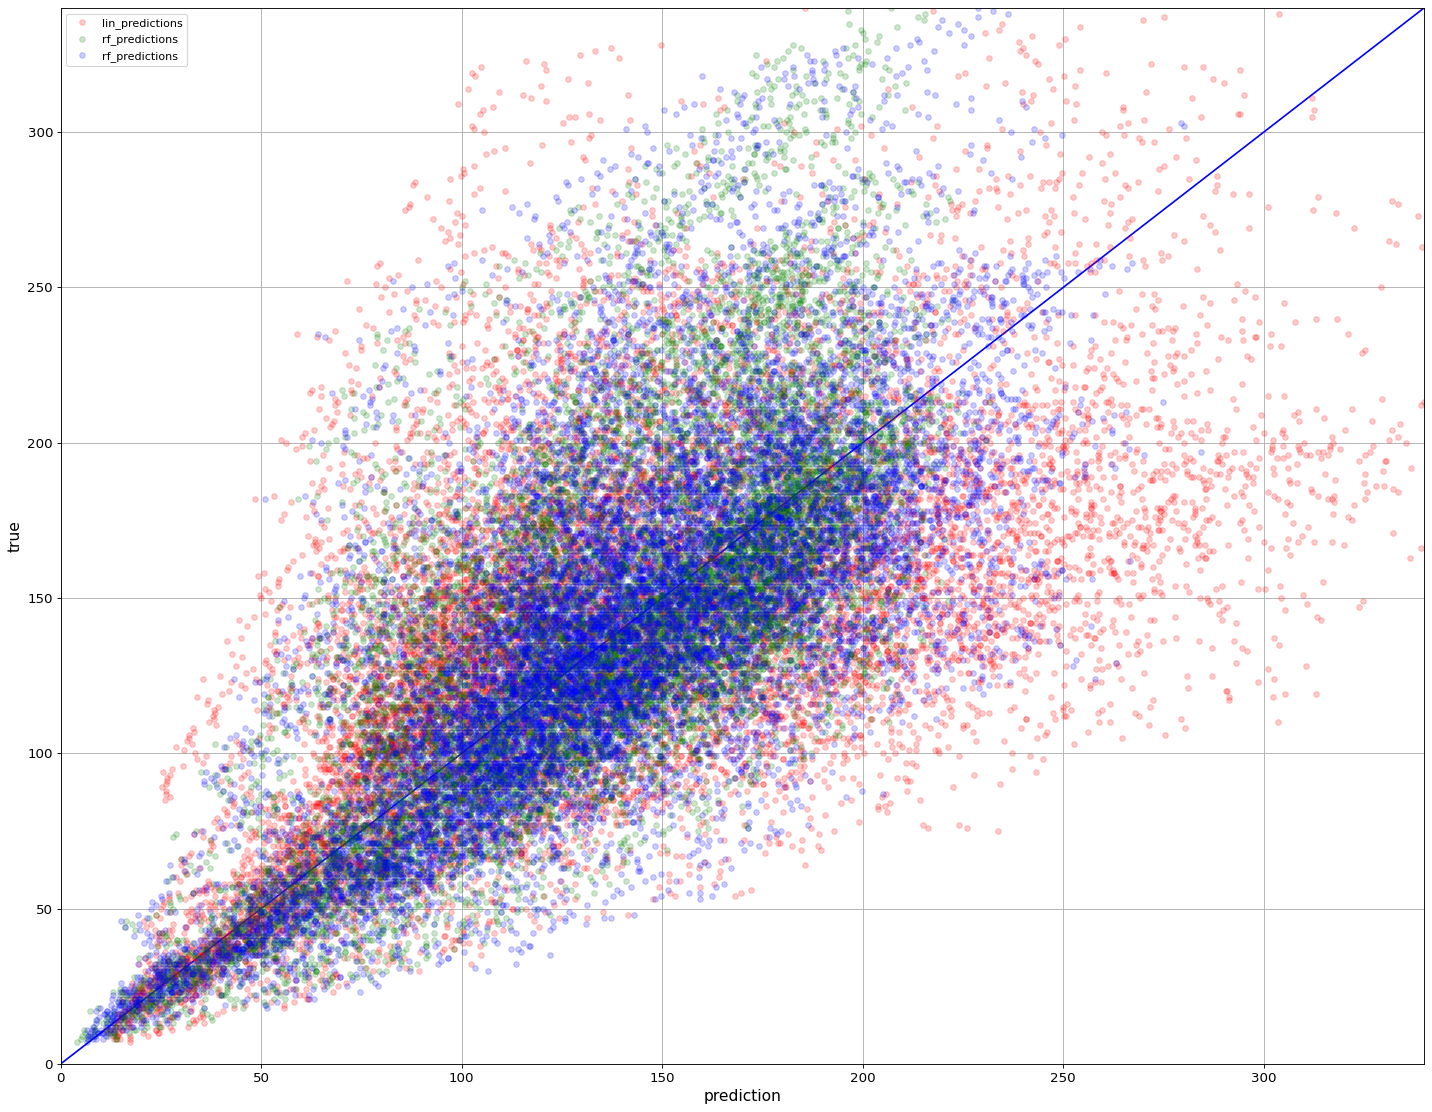

In [ ]:
figure(figsize=(18, 14), dpi=80)
x = np.linspace(0,500,500)
plt.plot(x,x,"b-")
plt.plot(fan_predictions[:13000], fd_001_test["RUL"][:13000], "r.", label="lin_predictions", alpha=0.2, markersize=10)
plt.plot(fan_predictions_rf[:13000], fd_001_test["RUL"][:13000], "g.", label="rf_predictions", alpha=0.2, markersize=10)
plt.plot(fan_predictions_poly[:13000], fd_001_test["RUL"][:13000], "b.", label="rf_predictions", alpha=0.2, markersize=10)
plt.legend()
plt.xlim(0,np.max(fd_001_test["RUL"]))
plt.ylim(0,np.max(fd_001_test["RUL"]))
plt.xlabel('prediction')
plt.ylabel('true')
plt.grid()
save_fig("Linear model without standardization")
plt.show()

Above model plot looks just as bad as earlier.